In [ ]:
import petls
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_pl():
    d1 = np.array([[-1,0,-1],
                [1,-1,0],
                [0,1,1]])
    d2 = np.array([[1],[1],[-1]]) 
    boundaries = [d1,d2]
    filtrations = [[0,1,2],[3,4,5],[5]]
    pl = petls.Complex(boundaries, filtrations)
    return pl

def min_nonzeros(eigs):
    tol = 1e-6
    nonzeros = [x for x in eigs if x > tol]
    if len(nonzeros) == 0:
        return 0
    return min(nonzeros)


pl = get_pl()
s = pl.spectra(allpairs=True)

In [5]:
print(s)
dim0 = [x for x in s if x[0] == 0 and x[2] <= 4]
print(dim0)
dim0nice = [(0, 0, 0, [0]), (0, 0, 3, [0]), (0, 0, 4, [0]), (0, 3, 3, [0, 0, 2]), (0, 3, 4, [0, 1, 3]), (0, 4, 4, [0, 1, 3])]
small_summaries = petls.summaries(dim0nice, min_nonzeros)
print(small_summaries)


[(0, 0.0, 0.0, [0.0]), (1, 0.0, 0.0, []), (2, 0.0, 0.0, []), (0, 0.0, 3.0, [0.0]), (1, 0.0, 3.0, []), (2, 0.0, 3.0, []), (0, 0.0, 4.0, [0.0]), (1, 0.0, 4.0, []), (2, 0.0, 4.0, []), (0, 0.0, 5.0, [0.0]), (1, 0.0, 5.0, []), (2, 0.0, 5.0, []), (0, 3.0, 3.0, [0.0, 0.0, 1.9999998807907104]), (1, 3.0, 3.0, [2.0]), (2, 3.0, 3.0, []), (0, 3.0, 4.0, [0.0, 0.9999998807907104, 3.0]), (1, 3.0, 4.0, [2.0]), (2, 3.0, 4.0, []), (0, 3.0, 5.0, [0.0, 3.0, 3.0]), (1, 3.0, 5.0, [2.0]), (2, 3.0, 5.0, []), (0, 4.0, 4.0, [0.0, 0.9999998807907104, 3.0]), (1, 4.0, 4.0, [0.9999999403953552, 2.999999761581421]), (2, 4.0, 4.0, []), (0, 4.0, 5.0, [0.0, 3.0, 3.0]), (1, 4.0, 5.0, [0.9999999403953552, 2.999999761581421]), (2, 4.0, 5.0, []), (0, 5.0, 5.0, [0.0, 3.0, 3.0]), (1, 5.0, 5.0, [3.0, 3.0, 3.0]), (2, 5.0, 5.0, [3.0])]
[(0, 0.0, 0.0, [0.0]), (0, 0.0, 3.0, [0.0]), (0, 0.0, 4.0, [0.0]), (0, 3.0, 3.0, [0.0, 0.0, 1.9999998807907104]), (0, 3.0, 4.0, [0.0, 0.9999998807907104, 3.0]), (0, 4.0, 4.0, [0.0, 0.999999880790

[0.0, 3.0, 4.0, 5.0]


/tmp/ipykernel_27057/4210758457.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


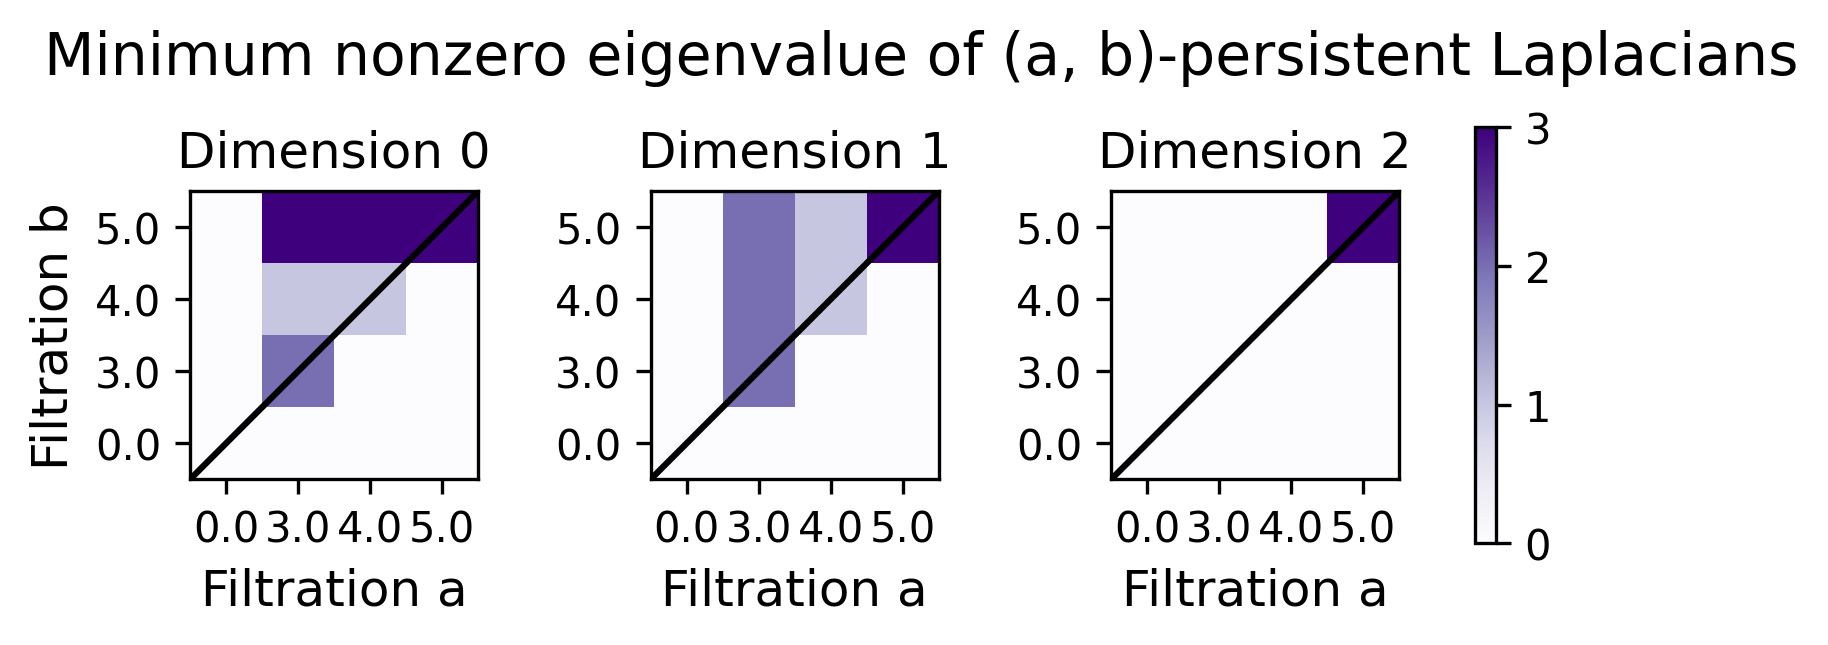

In [44]:
mins, filtrations, dims = petls.summaries(s, min_nonzeros)

cm = 1/2.54
fig, axes = plt.subplots(1,3,figsize=(6.5, 4), dpi=300)
plt.subplots_adjust(wspace=0.6)
fig.suptitle("Minimum nonzero eigenvalue of (a, b)-persistent Laplacians",y=0.75, fontsize=14)
for dim in range(len(dims)):
    pos = petls.plot_summary(axes[dim], mins[dim], filtrations, cmap="Purples")
    axes[dim].set_title(f"Dimension {dims[dim]}") 
    axes[dim].set_xlabel("Filtration a", fontsize=12)
    axes[dim].set_xticks(range(len(filtrations)),filtrations,fontsize=10)
    axes[dim].set_yticks(range(len(filtrations)),filtrations, fontsize=10)
    
axes[0].set_ylabel("Filtration b", fontsize=12)
print(filtrations)

fig.colorbar(pos, ax=axes.ravel().tolist(), shrink=0.45)

fig.show()